<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% />
</center>

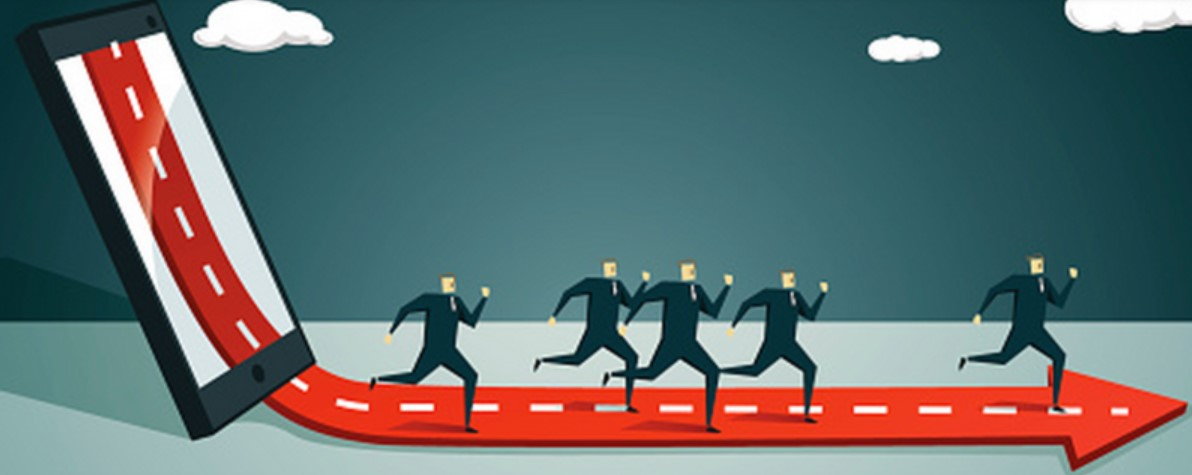

## TELECOM CHURN PREDICTION

**Submitted by SUJEET KUMAR PANDIT**

**PGP DSAI Student, INSAID**

**Batch: JUNE 20,2021**

# **Table of Contents**
1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Processing**](#Section5)<br>
6. [**Exploratory Data Analysis**](#Section6)<br>
7. [**Data Post-Processing**](#Section7)<br>
8. [**Model Development & Evaluation**](#Section8)<br>
9. [**Conclusion**](#Section9)</br>

<a name = Section1></a>
# **1. Introduction**
---
### Company Introduction - WeConnect

##### Your client for this project is a Telecom Service Provider - WeConnect.

- 1) The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
- 2) The objective is to use the model to take further actions for preventing customers to churn.
- 3) They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc.

### Current Scenario
   - Till now they have been using traditional ways which now have become a problem to handle due to human interventions.
   - They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.

<a name = Section2></a>
# **2. Problem Statement**
- This section is emphasised on providing some generic introduction to the problem that most companies confront.

### The company suffers from the following problems:
   - Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.
   - They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
   - It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.

In return, they have decided to find a more optimal way and hired a team of data scientists to solve this problem.

### Your Role
   - You are given datasets of past customers and their status (Churn: Yes or No).
   - Your task is to build a classification model using the dataset.
   - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  You need to build the best possible model.

### Project Deliverable
   - Deliverable: Predict whether a customer will churn or not..
   - Machine Learning Task: Classification
   - Target Variable: Churn (Yes / No)
   - Win Condition: N/A (best possible model)

### Evaluation Metric
   - The model evaluation will be based on the Accuracy Score.

# **3. Installing & Importing Libraries**
- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [3]:
!pip install ydata-profiling                               # Toolbox for Generating Statistics Report

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [99]:
!pip install --upgrade ydata-profiling

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [1]:
import numpy as np                                             # Importing package Numpy (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                            # Importing package pandas (For Panel Data Analysis)
import ydata_profiling
from ydata_profiling import ProfileReport                      # Import Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                # Importing matplotlib library for visualization
%matplotlib inline
import seaborn as sns                                          # Importing seaborn library for interactive visualization
#--------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                             # Importing library for scientific calculations
#--------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder                 # Importing encoding function
from sklearn.preprocessing import StandardScaler               # Importing StandardScaler function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score ,recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report

#--------------------------------------------------------------------------------------------------------------------------
import warnings                                                # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                              # Warnings will appear only once

# 4. Data Acquisition & Description
 - We are provided with the dataset containing all the necessary information about the customers like their Gender, MonthlyCharges, TotalCharges, PaymentMethod, InternetService, etc.

 - Also included in the dataset is the column Churn which classifies whether the customer will churn or not.

 - This is the data that we have to predict for the future customers.
 
#### The dataset is divided into two parts: Train and Test sets.

#### Training Set: 
 - The train set contains **5634 rows** and **21 columns**.
 - The last column **Churn** is the **target variable**.

#### Testing Set:
 - The test set contains **1409 rows** and **20 columns**.
 - The test set **doesn’t contain** the **Churn** column.
 - It needs to be predicted for the test set.
 
**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**5634**|**21**|**Churn**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**1409**|**20**|**Churn**|
 
 |***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| CustomerID      | Passenger Identity|
|02| Gender          | Whether the customer is a male or a female|  
|03| SeniorCitizen   | Whether the customer is a senior citizen or not (1, 0)| 
|04| Partner         | Whether the customer has a partner or not (Yes, No)|   
|05| Dependents      | Whether the customer has dependents or not (Yes, No) |
|06| Tenure          | Number of months the customer has stayed with the company|
|07| PhoneService    | Whether the customer has a phone service or not (Yes, No)|
|08| MultipleLines   | Whether the customer has multiple lines or not (Yes, No, No phone service)|
|09| InternetService | Customer’s internet service provider (DSL, Fiber optic, No)|
|10| OnlineSecurity  | Whether the customer has online security or not (Yes, No, No internet service)|
|11| OnlineBackup    | Whether the customer has online backup or not (Yes, No, No internet service)|
|12| DeviceProtection| Whether the customer has device protection or not (Yes, No, No internet service) |
|13| TechSupport     | Whether the customer has tech support or not (Yes, No, No internet service)|
|14| StreamingTV     | Whether the customer has streaming TV or not (Yes, No, No internet service)|
|15| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service)|
|16| Contract        | The contract term of the customer (Month-to-month, One year, Two year)|
|17| PaperlessBilling| Whether the customer has paperless billing or not (Yes, No)|
|18| PaymentMethod   |The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|19| MonthlyCharges  |The amount charged to the customer monthly|
|20| TotalCharges    |The total amount charged to the customer|
|21| Churn           |Whether the customer churned or not (Yes or No)|

<a name = Section4></a>
# **4.1. Data Acquisition**

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

In [2]:
df = pd.read_csv(r"D:\DS Training\Term_Project_24\Term_Project_Gros\Telecom-Churn\Churn_train.csv")   #import train data

print('Data Shape:', df.shape)
df.head()

Data Shape: (5634, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


 ### **Data Information**
- **Totally there are 21 Features/Columns**
- **Totally there are 5634 Records/Rows**
- **Check whether the NUMERICAL Columns have 0s and if they are relevant**
- **Check whether the CATEGORICAL Columns have correct datatype of not**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**In data(train) dataset, TotalCharges Record is in Categorical dataype but it should be Numerical, have to convert it**

In [4]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors= "coerce")

### **Data Description**

- **To get some quick description out of the data you can use describe method defined in pandas library.**
- **Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5626.000000
mean,0.161874,32.277955,64.779127,2280.662380
std,0.368368,24.555211,30.104993,2266.394623
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,391.900000
50%,0.000000,29.000000,70.375000,1394.800000
75%,0.000000,55.000000,89.850000,3794.487500
max,1.000000,72.000000,118.650000,8684.800000


In [6]:
df_final = pd.read_csv(r"D:\DS Training\Term_Project_24\Term_Project_Gros\Telecom-Churn\Churn_test.csv")#import test data

print('Data Shape:', df_final.shape)
df_final.head()

Data Shape: (1409, 20)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


**In data_final(train) dataset, TotalCharges Record is in Categorical dataype but it should be Numerical, have to convert it**

In [8]:
df_final['TotalCharges'] = df_final['TotalCharges'].apply(pd.to_numeric, errors= "coerce")

In [9]:
df_final.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1409.000000,1406.000000
mean,0.163236,32.743790,64.691980,2293.856437
std,0.369712,24.581736,30.040784,2269.054321
min,0.000000,0.000000,18.700000,19.200000
25%,0.000000,9.000000,36.850000,423.687500
50%,0.000000,29.000000,70.150000,1413.550000
75%,0.000000,56.000000,89.850000,3791.875000
max,1.000000,72.000000,118.750000,8672.450000


# **5. Data Pre-Processing**
- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [10]:
# Create a ProfileReport object
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("tele_churn_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**5.1 Data Pre-Profiling for TEST SET**

In [11]:
# Create a ProfileReport object
profile = ProfileReport(df_final, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("tele_churn_test_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **6. Exploratory Data Analysis**

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - **Handling/Checking Duplicate Data for both the TRAIN and TEST Data Sets**

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

-**There are actually NO DUPLICATE RECORDS/ROWS in the DATA-SETS**



In [12]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
df_final[df_final.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


-**Now Check ALL the NUMERICAL COLUMNS for ZERO values and Replace/Substitute them with appropriate values**

-**viz. (i) tenure, (ii) MonthlyCharges and (iii) TotalCharges**

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [15]:
(df == 0 ).sum(axis = 0)

customerID             0
gender                 0
SeniorCitizen       4722
Partner                0
Dependents             0
tenure                 8
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [16]:
df_final.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [17]:
(df_final == 0 ).sum(axis = 0)

customerID             0
gender                 0
SeniorCitizen       1179
Partner                0
Dependents             0
tenure                 3
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64

### (i) Check for tenure column

In [18]:
df[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
899,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2224,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
2697,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
3054,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3488,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4056,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
4761,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
5607,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No


In [19]:
df_final[df_final.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
103,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
592,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
1327,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN


#### We find that in the Training DataSet; 8 Cells in tenure column have 0 values and the corresponding cells in the TotalCharges are blanks, which means these are New Customers
#### Also We find that in the Testing DataSet; 3 Cells in tenure column have 0 values and the corresponding cells in the TotalCharges are blanks, which means these are New Customers
#### Replace the TotalCharges with 0s

In [20]:
#Replacing missing value rows with ZEROs
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [21]:
df_final['TotalCharges'] = df_final['TotalCharges'].fillna(0)

#### Recheck whether in the TotalCharges column BLANK values have been filled with 0s both in the Training and Testing DataSets

In [22]:
df[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
899,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
2224,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
2697,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
3054,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
3488,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No
4056,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
4761,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
5607,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No


In [23]:
df_final[df_final.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
103,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
592,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0
1327,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0


### **Check whether the DataSet is Balanced**

No     4113
Yes    1521
Name: Churn, dtype: int64

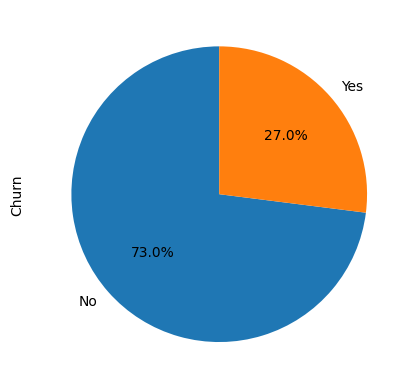

In [24]:
df.Churn.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90);
df.Churn.value_counts()

#### What is the range of values (minimum to maximum) in the Tenure column of the train data before preprocessing?

<AxesSubplot: xlabel='tenure', ylabel='Density'>

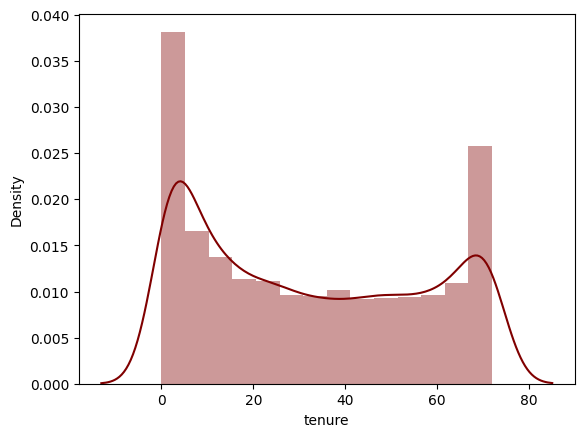

In [25]:
sns.distplot(a= df.tenure , kde=True, color = 'maroon')

###  **Plots show that the count is HIGH for the period of tenures of 0-5 & 65-70 months**

### **Check the Churn pattern for the Category SENIOR CITIZEN and NOT-SENIOR CITIZEN**

<AxesSubplot: >

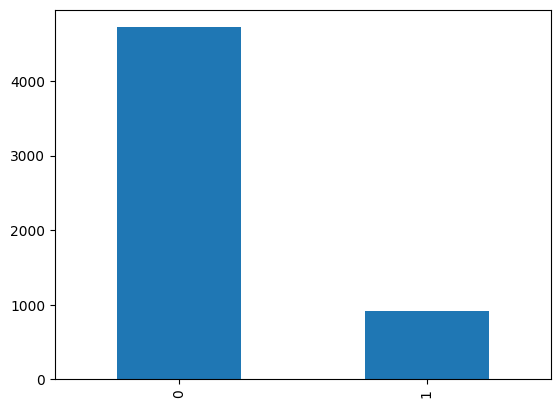

In [26]:
df.SeniorCitizen.value_counts().plot(kind='bar')

#### Which category has the highest proportion in the Sex column in train data?

<AxesSubplot: >

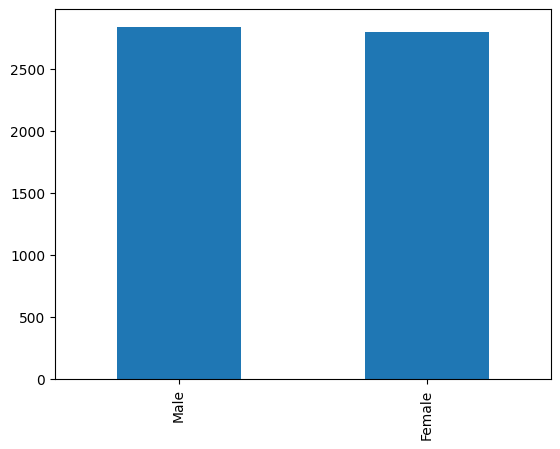

In [30]:
df['gender'].value_counts().plot(kind='bar')

#### What is the maximum value in the MonthlyCharges column of the train data before preprocessing?

In [32]:
df['MonthlyCharges'].max()

118.65

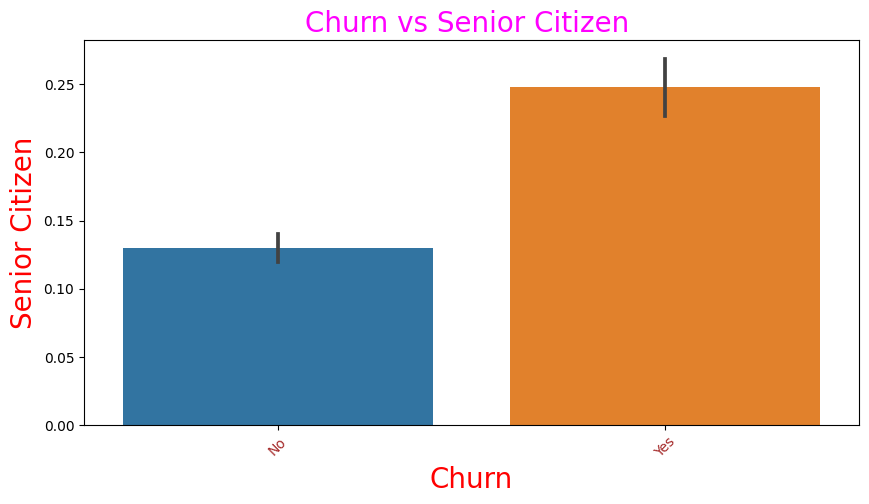

In [34]:
fig = plt.figure(figsize=[10, 5])

# Plot the barplot figure
sns.barplot(x= df.Churn, y= df.SeniorCitizen)


# Modifying Colour, Size, Legend
plt.xticks(rotation =45,color = 'brown')
plt.xlabel('Churn', size= 20, color= 'RED')
plt.ylabel('Senior Citizen', size = 20, color = 'RED')
plt.title('Churn vs Senior Citizen ', size = 20, color = 'magenta')
plt.show()

Text(0.5, 1.0, 'Correlation HeatMap')

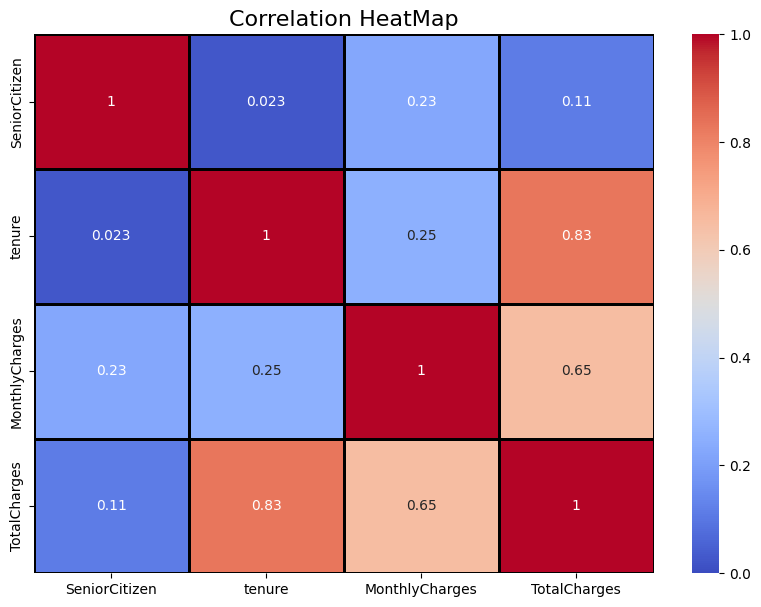

In [35]:
figure = plt.figure(figsize = (10,7))
HeatMap = sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

### OBSERVATIONS
- **TotalCharges** has HIGH CORRELATION with **MonthlyCharges**
- **TotalCharges** has HIGH CORRELATION with **Tenure**
- PaperlessBilling has HIGH CORRELATION with MonthlyCharges
- tenure has HIGH CORRELATION with Contract
- tenure has HIGH CORRELATION with Partner
- Partner has HIGH CORRELATION with Dependents
- Gender has NO IMPACT on Churn

### Seperating out the Categorical and Numerical columns

In [36]:
df_cat = df[['gender', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']]

df_num = df[['SeniorCitizen','tenure',  'MonthlyCharges']]

### Transformation of Categorical data

In [37]:
# Importing encoding function
from sklearn.preprocessing import LabelEncoder

#Transformation of categorical variable
df_cat = df_cat.apply(LabelEncoder().fit_transform)

In [38]:
df_cat.head()

,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1,1,1,0,2,1,1,1,1,1,1,2,3
1,0,0,1,0,0,2,2,2,2,0,2,1,1
2,1,0,1,2,0,2,2,0,2,0,0,2,0
3,1,1,1,2,0,2,0,2,2,2,2,1,2
4,1,0,1,0,0,2,2,0,2,2,0,1,2


In [39]:
#converting the target column: Churn into 1, 0
churn_scal = df['Churn'].map({'Yes':1,'No':0})

### Transforming the numerical data

In [40]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_arr = scaler.fit_transform(df_num)

# Inputting our transformed data in a dataframe
scaled_data = pd.DataFrame(data=scaled_arr, columns=df_num.columns)

# Getting a glimpse of transformed data
scaled_data.head()
scaled_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5.634000e+03,5.634000e+03,5.634000e+03
mean,3.152923e-17,-3.089865e-17,-4.068847e-16
std,1.000089e+00,1.000089e+00,1.000089e+00
min,-4.394753e-01,-1.314622e+00,-1.545699e+00
25%,-4.394753e-01,-9.480685e-01,-9.759755e-01
50%,-4.394753e-01,-1.335051e-01,1.858951e-01
75%,-4.394753e-01,9.254272e-01,8.328552e-01
max,2.275441e+00,1.617806e+00,1.789592e+00


### Merging the Categorical, Numerical & target data

In [41]:
data_model = pd.concat([scaled_data, df_cat,churn_scal], axis = 1)
data_model.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn
0,-0.439475,-0.825884,-1.497530,1,1,1,0,2,1,1,1,1,1,1,2,3,0
1,-0.439475,0.395961,0.302996,0,0,1,0,0,2,2,2,2,0,2,1,1,1
2,-0.439475,1.577078,0.012320,1,0,1,2,0,2,2,0,2,0,0,2,0,0
3,-0.439475,1.577078,0.686687,1,1,1,2,0,2,0,2,2,2,2,1,2,0
4,-0.439475,-0.092777,0.186726,1,0,1,0,0,2,2,0,2,2,0,1,2,0


### Split the data into x and y. Meaning y is the DEPENDENT/TARGET variable and x as FEATURE/INDEPENDENT variable

In [42]:
x = data_model.drop('Churn', axis = 1)
x.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,-0.439475,-0.825884,-1.497530,1,1,1,0,2,1,1,1,1,1,1,2,3
1,-0.439475,0.395961,0.302996,0,0,1,0,0,2,2,2,2,0,2,1,1
2,-0.439475,1.577078,0.012320,1,0,1,2,0,2,2,0,2,0,0,2,0
3,-0.439475,1.577078,0.686687,1,1,1,2,0,2,0,2,2,2,2,1,2
4,-0.439475,-0.092777,0.186726,1,0,1,0,0,2,2,0,2,2,0,1,2


In [43]:
y = data_model['Churn']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int64

# **7. Data Post Processing**

### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

### Import the train test split and split the data into train and test data for x and y.

In [44]:
#importing the train test split function
from sklearn.model_selection import train_test_split

In [45]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (4507, 16)
y_train shape:  (4507,)
x_test shape:  (1127, 16)
y_test shape:  (1127,)


# **8. Model Development & Evaluation**

### Import the Logistic Regression function and LOAD it

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

### Train the Model using x_train and y_train

In [47]:
logreg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

### Make the predictions using the trained model for both TRAINING and TESTING data.

In [48]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
y_pred_test = logreg.predict (x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
probabilities = logreg.predict_proba(x_test)
probabilities

array([[0.95968098, 0.04031902],
       [0.66674968, 0.33325032],
       [0.97912639, 0.02087361],
       ...,
       [0.91297218, 0.08702782],
       [0.88618745, 0.11381255],
       [0.98694379, 0.01305621]])

### Importing the evaluation metrics for Classification model - Logistic Regression

In [51]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report

### Accuracy Score with Training Set

In [52]:
accuracy_score(y_train,y_pred_train)

0.8085200798757488

### Accuracy Score with Testing Set

In [53]:
accuracy_score(y_test,y_pred_test)

0.782608695652174

### Confusion Matrix

In [54]:
confusion_matrix(y_train,y_pred_train)

array([[2970,  315],
       [ 548,  674]], dtype=int64)

In [55]:
confusion_matrix(y_test,y_pred_test)

array([[734,  94],
       [151, 148]], dtype=int64)

### Precision Score

In [56]:
precision_score(y_train,y_pred_train)

0.6814964610717897

In [57]:
precision_score(y_test,y_pred_test)

0.6115702479338843

### Recall Score

In [58]:
recall_score(y_train,y_pred_train)

0.5515548281505729

In [59]:
recall_score(y_test,y_pred_test)

0.49498327759197325

### F1 Score

In [60]:
f1_score(y_train,y_pred_train)

0.6096788783355949

In [61]:
f1_score(y_test,y_pred_test)

0.5471349353049908

### Classification Report

In [62]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3285
           1       0.68      0.55      0.61      1222

    accuracy                           0.81      4507
   macro avg       0.76      0.73      0.74      4507
weighted avg       0.80      0.81      0.80      4507



In [63]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       828
           1       0.61      0.49      0.55       299

    accuracy                           0.78      1127
   macro avg       0.72      0.69      0.70      1127
weighted avg       0.77      0.78      0.77      1127



### AUC_ROC curve  and AUC_ROC_score for Training DataSet

In [64]:
from sklearn import metrics
probs_train = logreg.predict_proba(x_train)

In [65]:
preds_train = probs_train[:,1]
preds_train

array([0.14268954, 0.70977813, 0.62089481, ..., 0.43417077, 0.02324426,
       0.02302085])

In [66]:
print(roc_auc_score(y_train,preds_train))

0.8453147147551111


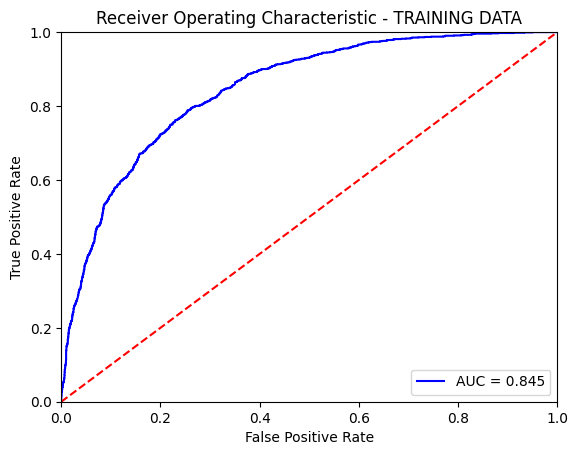

In [67]:
from sklearn import metrics
probs_train = logreg.predict_proba(x_train)
preds_train = probs_train[:,1]
fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_train, preds_train)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - TRAINING DATA')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.3f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AUC_ROC curve  and AUC_ROC_score for Testing DataSet

In [68]:
from sklearn import metrics
probs_test = logreg.predict_proba(x_test)

In [69]:
preds_test = probs_test[:,1]
preds_test

array([0.04031902, 0.33325032, 0.02087361, ..., 0.08702782, 0.11381255,
       0.01305621])

In [70]:
print(roc_auc_score(y_test,preds_test))

0.8209308807134894


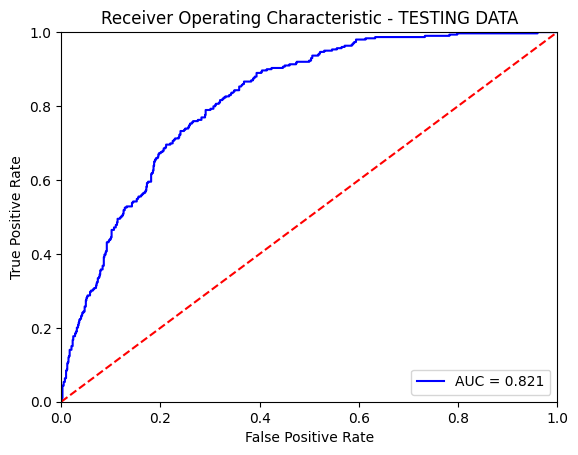

In [71]:
from sklearn import metrics
probs_test = logreg.predict_proba(x_test)
preds_test = probs_test[:,1]
fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test, preds_test)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - TESTING DATA')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.3f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [72]:
df_submission = df_final['customerID']
df_submission.head()

0    8879-ZKJOF
1    0201-MIBOL
2    1600-DILPE
3    8601-QACRS
4    7919-ZODZZ
Name: customerID, dtype: object

In [73]:
df_final_cat = df_final[['gender', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']]

df_final_num = df_final[['SeniorCitizen','tenure',  'MonthlyCharges']]

### Apply Label Encoding on the Categorical features

In [74]:
# Importing encoder function
from sklearn.preprocessing import LabelEncoder

#Transformation of categorical variable
df_final_cat = df_final_cat.apply(LabelEncoder().fit_transform)
df_final_cat.head()

,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,0,0,1,0,0,2,0,2,2,2,2,1,0
1,0,0,1,2,1,2,0,0,0,2,2,2,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,0,0,0,0,0,0,0,0,3
4,0,1,1,0,0,0,2,2,0,0,2,1,3


### Apply Standard Scaling on the Numerical Features

In [75]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_final_arr = scaler.fit_transform(df_final_num)

# Inputting our transformed data in a dataframe
scaled_final_data = pd.DataFrame(data=scaled_final_arr, columns=df_final_num.columns)

# Getting a glimpse of transformed data
scaled_final_data.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.441679,0.335987,0.504761
1,2.264086,1.353363,1.255673
2,-0.441679,-0.844170,-0.655741
3,-0.441679,-1.129035,-0.469262
4,-0.441679,-0.925560,0.040227


### Concatenate the Categorical and Numerical features

In [76]:
df_final_model = pd.concat([scaled_final_data, df_final_cat], axis=1)
df_final_model.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,-0.441679,0.335987,0.504761,0,0,1,0,0,2,0,2,2,2,2,1,0
1,2.264086,1.353363,1.255673,0,0,1,2,1,2,0,0,0,2,2,2,0
2,-0.441679,-0.844170,-0.655741,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.441679,-1.129035,-0.469262,0,0,1,2,0,0,0,0,0,0,0,0,3
4,-0.441679,-0.925560,0.040227,0,1,1,0,0,0,2,2,0,0,2,1,3


### Predict the label values using the earlier trained Logistic Regression Model

In [77]:
y_pred_test_final = logreg.predict(df_final_model)
y_pred_test_final

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Convert the array into a DataFrame

In [78]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)
y_pred_test_final.head(6)

,0
0,0
1,0
2,0
3,0
4,0
5,0


## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(customerID) and TARGET column(Churn)

In [79]:
submission_file = pd.concat([df_submission,y_pred_test_final], axis = 1)
submission_file.head(6)

,customerID,0
0,8879-ZKJOF,0
1,0201-MIBOL,0
2,1600-DILPE,0
3,8601-QACRS,0
4,7919-ZODZZ,0
5,7964-ZRKKG,0


### To convert Churn values from 0/1 back to Yes/No

In [80]:
submission_file.replace({1:"Yes", 0:"No"}, inplace = True)
submission_file.head()

,customerID,0
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,No
3,8601-QACRS,No
4,7919-ZODZZ,No


### Remove HEADER and INDEX from submission file

In [81]:
submission_file.to_csv('C:/Users/Kanishk/Downloads/Churn_submission.csv', header=False, index=False)

In [82]:
y_pred_test_final.to_csv('C:/Users/Kanishk/Downloads/Telecom_Churn_Prediction_logreg.csv')

<a name = Section9></a>

---
# **9. Conclusion**
- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to churn and not churn.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** which CustomerID is churn and which did not churn.